In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
import seaborn as sb

In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")





In [3]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
train.shape

(82657, 12)

In [5]:
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [6]:
test.shape

(20665, 11)

In [7]:
train.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [8]:
test.describe()

,points,price
count,20665.000000,19271.000000
mean,88.524897,36.217166
std,3.055695,39.362644
min,80.000000,4.000000
25%,86.000000,17.500000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,2500.000000


In [9]:
train.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [10]:
test.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
user_name             15927 non-null object
country               20661 non-null object
review_title          20665 non-null object
review_description    20665 non-null object
designation           14676 non-null object
points                20665 non-null int64
price                 19271 non-null float64
province              20661 non-null object
region_1              17351 non-null object
region_2              8914 non-null object
winery                20665 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


### 2. Data Manipulation and Visualization
Lets check for NaN (null) values in the data

In [11]:
train.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [12]:
test.isnull().sum()

user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

In [13]:
train['variety'].describe()

count          82657
unique            28
top       Pinot Noir
freq           10587
Name: variety, dtype: object

In [14]:
train['variety']

0                        Chardonnay
1                         Red Blend
2                          Nebbiolo
3        Bordeaux-style White Blend
4                            Malbec
5                Cabernet Sauvignon
6                         Red Blend
7                         Zinfandel
8                        Pinot Noir
9                         Red Blend
10                  Sauvignon Blanc
11                       Chardonnay
12                            Gamay
13                 Grüner Veltliner
14                        Red Blend
15         Bordeaux-style Red Blend
16                        Red Blend
17                       Chardonnay
18                         Nebbiolo
19                       Sangiovese
20               Cabernet Sauvignon
21                         Nebbiolo
22                       Pinot Noir
23                         Nebbiolo
24         Bordeaux-style Red Blend
25         Bordeaux-style Red Blend
26                           Malbec
27                       Cha

In [15]:
big_df=train.append(test,sort=False)


In [16]:
big_df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [17]:
big_df.shape

(103322, 12)

In [18]:
big_df.tail()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,NaN
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute,NaN
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou,NaN
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal,NaN
20664,NaN,US,Langtry 2005 Tephra Ridge Vineyard Cabernet Sa...,"With very ripe fruit and firm tannins, this mo...",Tephra Ridge Vineyard,87,40.0,California,Lake County,NaN,Langtry,NaN


In [19]:
big_df['variety']

0                        Chardonnay
1                         Red Blend
2                          Nebbiolo
3        Bordeaux-style White Blend
4                            Malbec
5                Cabernet Sauvignon
6                         Red Blend
7                         Zinfandel
8                        Pinot Noir
9                         Red Blend
10                  Sauvignon Blanc
11                       Chardonnay
12                            Gamay
13                 Grüner Veltliner
14                        Red Blend
15         Bordeaux-style Red Blend
16                        Red Blend
17                       Chardonnay
18                         Nebbiolo
19                       Sangiovese
20               Cabernet Sauvignon
21                         Nebbiolo
22                       Pinot Noir
23                         Nebbiolo
24         Bordeaux-style Red Blend
25         Bordeaux-style Red Blend
26                           Malbec
27                       Cha

In [20]:
big_df.dtypes

user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                 object
variety                object
dtype: object

In [21]:
big_df = big_df.drop(['user_name'],axis= 1)

In [22]:
big_df.head(3)

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo


In [23]:
big_df = big_df.drop(['region_1','region_2','designation',],axis= 1)

In [24]:
big_df.head(3)

,country,review_title,review_description,points,price,province,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Renato Ratti,Nebbiolo


In [25]:
big_df.isnull().sum()

country                  39
review_title              0
review_description        0
points                    0
price                  6963
province                 39
winery                    0
variety               20665
dtype: int64

In [26]:
big_df[big_df['price'].isnull()]


,country,review_title,review_description,points,price,province,winery,variety
23,Italy,Eredi Lodali 2008 Lorens (Barbaresco),"Sophisticated and bright, this beautiful Barba...",91,NaN,Piedmont,Eredi Lodali,Nebbiolo
28,France,Château du Glana 2010 Barrel sample (Saint-Ju...,"91-93 Smooth, rich strong wine, with delicious...",92,NaN,Bordeaux,Château du Glana,Bordeaux-style Red Blend
46,Portugal,Dona Maria-Júlio Bastos 2014 Dona Maria Branco...,"This wine is soft, a gentle meander through wh...",84,NaN,Alentejano,Dona Maria-Júlio Bastos,Portuguese White
59,Italy,Francesco Rinaldi 2011 Cannubi (Barolo),Subdued but classic Nebbiolo aromas of red ber...,92,NaN,Piedmont,Francesco Rinaldi,Nebbiolo
61,Portugal,1912 Winemakers 2009 Piorro Reserva Red (Douro),An oak-aged wine that is rich and structured a...,92,NaN,Douro,1912 Winemakers,Portuguese Red
89,Italy,Ca' du Rabajà 2009 Barbaresco,"Linear, silky and long, this has ethereal tone...",89,NaN,Piedmont,Ca' du Rabajà,Nebbiolo
94,France,Château Escot 2011 Médoc,"While there are firm tannins here, the wine al...",87,NaN,Bordeaux,Château Escot,Bordeaux-style Red Blend
106,France,Domaine Corine Perchaud 2009 Vaucoupin Premier...,A soft wood- and almond-flavored wine. It miss...,86,NaN,Burgundy,Domaine Corine Perchaud,Chardonnay
118,France,Henri Bourgeois 2009 En Travertin (Pouilly-Fumé),"Very intense herbal wine, full-bodied, with hi...",89,NaN,Loire Valley,Henri Bourgeois,Sauvignon Blanc
124,Israel,Tabor 2010 Limited Edition Cabernet Sauvignon ...,"Inky garnet in the glass, this wine offers aro...",88,NaN,Galilee,Tabor,Cabernet Sauvignon


In [27]:
big_df['price']=big_df['price'].fillna('50')  

In [28]:
big_df.head()

,country,review_title,review_description,points,price,province,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10,Australia Other,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15,Washington,North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80,Piedmont,Renato Ratti,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33,France Other,Château du Cèdre,Malbec


In [29]:
big_df.isnull().sum()

country                  39
review_title              0
review_description        0
points                    0
price                     0
province                 39
winery                    0
variety               20665
dtype: int64

In [30]:
big_df['variety'].fillna("None",inplace=True)
big_df['country'].fillna("None",inplace=True)
big_df['province'].fillna("None",inplace=True)

In [31]:
big_df.isnull().sum()

country               0
review_title          0
review_description    0
points                0
price                 0
province              0
winery                0
variety               0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df["country"]=encoder.fit_transform(big_df['country'])
big_df["review_title"]=encoder.fit_transform(big_df['review_title'])
big_df["review_description"]=encoder.fit_transform(big_df['review_description'])
big_df["province"]=encoder.fit_transform(big_df['province'])
big_df["winery"]=encoder.fit_transform(big_df['winery'])
big_df["variety"]=encoder.fit_transform(big_df['variety'])

In [33]:
big_df.head()

,country,review_title,review_description,points,price,province,winery,variety
0,2,2835,20788,83,10,19,425,5
1,38,64070,86823,89,15,357,10330,18
2,19,72478,16622,94,80,244,11612,11
3,12,31623,37287,87,22,292,5800,1
4,12,22599,82869,88,33,108,4033,9


In [34]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103322 entries, 0 to 20664
Data columns (total 8 columns):
country               103322 non-null int32
review_title          103322 non-null int32
review_description    103322 non-null int32
points                103322 non-null int64
price                 103322 non-null object
province              103322 non-null int32
winery                103322 non-null int32
variety               103322 non-null int32
dtypes: int32(6), int64(1), object(1)
memory usage: 4.7+ MB


In [35]:
df_train=big_df[0:82657] # The Lasso is a linear model that estimates sparse coefficients
df_test=big_df[82657:]

In [36]:
X=df_train.drop(['variety'],axis=1)
y=df_train.variety

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
from sklearn.linear_model import Lasso #Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0
from sklearn.feature_selection import SelectFromModel

In [39]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [40]:
model.fit(X_train,y_train)

c:\users\shishir kumar thakur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1903988.8093751266, tolerance: 408.0298117941897
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [41]:
model.get_support()

array([ True,  True, False,  True,  True,  True,  True])

In [42]:
selected_features=X_train.columns[(model.get_support())]

In [43]:
selected_features

Index(['country', 'review_title', 'points', 'price', 'province', 'winery'], dtype='object')

### LogisticRegression

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics

In [68]:
reg = linear_model.LogisticRegression()

In [69]:
reg.fit(X_train, y_train)

c:\users\shishir kumar thakur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shishir kumar thakur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = reg.predict(X_test) 

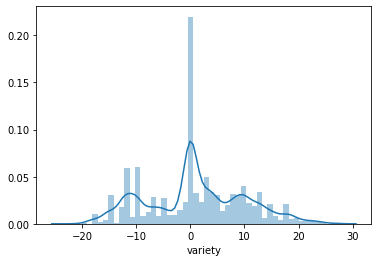

In [72]:
import seaborn as sns

sns.distplot(y_test-y_pred)

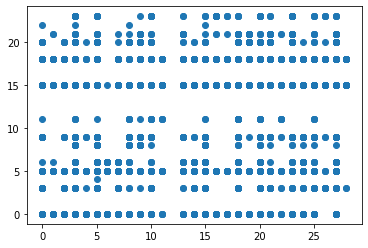

In [73]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [74]:
pred=pd.DataFrame()

In [75]:
pred['variety']=y_pred

In [76]:
pred['variety']=round(pred['variety'])

In [79]:
pred.to_excel("DecisonTree.xlsx",index=False)